 in depwarn at ./deprecated.jl:73
while loading In[1], in expression starting on line 7


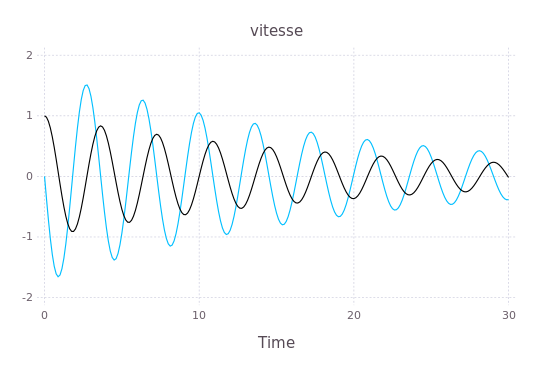

In [1]:
using Sundials,Gadfly,ODE
function oscillator(t, y, ydot)
    ydot[1] = y[2]
    ydot[2] = - 3 * y[1] - y[2] / 10
end
initial = [1.0, 0.0];                   # Initial conditions
t = float([0:0.125:30]);                # Time steps for solution
xv = Sundials.cvode(oscillator, initial, t);
xv[1:5,:]
plot(layer(x = t, y = xv[:,1], Geom.line(), 
     Theme(default_color = colorant"black")),
     layer(x = t, y = xv[:,2], Geom.line()),
     Guide.xlabel("Time"),
     Guide.ylabel(""),
Guide.title("vitesse"))

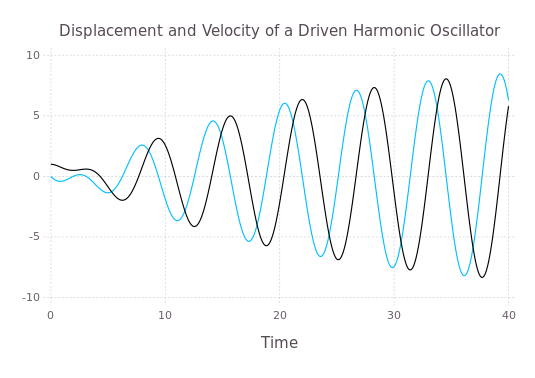

In [2]:
function oscillator(t, y)
    [y[2]; - a * y[1] - y[2] / 10 + sin(t)]
end

a = 1;                                  # Resonant
# a = 3;                                # Far from resonance
#
# Solve using an adaptive scheme (so we don't need to specify time steps explicitly).
#
T, xv = ode23(oscillator, initial, [0.; 40]; maxstep = 0.001);
xv = hcat(xv...).';                     # Vector{Vector{Float}} -> Matrix{Float}

plot(layer(x = T, y = xv[:,1], Geom.line(), Theme(default_color = colorant"black")),
     layer(x = T, y = xv[:,2], Geom.line()),
     Guide.xlabel("Time"),
     Guide.ylabel(""),
     Guide.title("Displacement and Velocity of a Driven Harmonic Oscillator"))

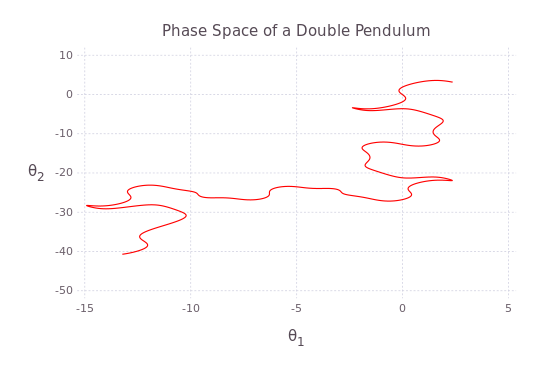

In [3]:
function pendulum(t, y)
    Y = [
    6 * (2 * y[3] - 3 * cos(y[1] - y[2]) * y[4]) / (16 - 9 * cos(y[1] - y[2])^2);
    6 * (8 * y[4] - 3 * cos(y[1] - y[2]) * y[3]) / (16 - 9 * cos(y[1] - y[2])^2)
    ]
    [
    Y[1];
    Y[2];
    - (Y[1] * Y[2] * sin(y[1] - y[2]) + 3 * sin(y[1])) / 2;
    - (sin(y[2]) - Y[1] * Y[2] * sin(y[1] - y[2])) / 2;
    ]
end

initial = [3/4 * pi, pi, 0, 0];         # Initial conditions -> chaotic behaviour
# initial = [pi / 4, 0, 0, 0];          # Initial conditions -> deterministic behaviour

T, xv = ode23(pendulum, initial, [0.; 40]);
xv = hcat(xv...).';

plot(layer(x = T, y = xv[:,1], Geom.line(), Theme(default_color = colorant"black")),
     layer(x = T, y = xv[:,2], Geom.line()),
     Guide.xlabel("Time"),
     Guide.ylabel(""),
     Guide.title("Angular Displacement versus Time for a Double Pendulum"))

plot(x = xv[:,1], y = xv[:,2], Geom.path(), Theme(default_color = colorant"red"),
     Guide.xlabel("θ<sub>1</sub>"),
     Guide.ylabel("θ<sub>2</sub>"),
     Guide.title("Phase Space of a Double Pendulum"))
